<a href="https://colab.research.google.com/github/OuhmadMohamed/DI_Bootcamp/blob/main/Week6/Day2/ExercisesXPGold_KMeans_Student_w6_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises XP Gold - K-means from scratch

## What you will create
- A K-means implementation in pure NumPy.
- Scatter plots of clusters and centroid convergence.
- A report with cluster assignments per point.
- A random centroid initializer to study initialization impact.

## What you will learn
- Euclidean distance and closest-centroid assignment.
- How centroid updates reduce within-cluster variance.
- Why initialization matters and how to evaluate runs.


## Task 1 - Load and visualize the dataset
Dataset: `ex7data2.mat` contains an array `X` of shape (m, 2).

- Load with `scipy.io.loadmat`
- Inspect shape and preview first rows
- Scatter plot of points

Shape of X: (300, 2)
First 5 rows of X:
First 5ros:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


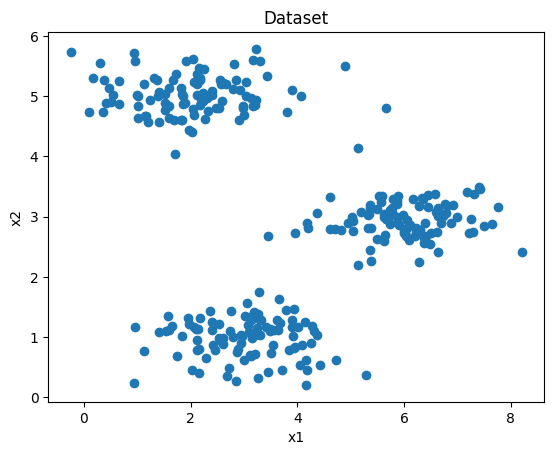

In [ ]:
# TODO: load X from the .mat file
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat_path = '/content/ex7data2.mat'
data = loadmat(mat_path)
#print(data)
# TODO: set X to the numpy array of points
X = data['X']
  # TODO
print('Shape of X:', X.shape)  # TODO replace None with X.shape
# TODO: preview first 5 rows
print('First 5 rows of X:')
print('First 5ros:\n',X[:5])
# TODO: scatter plot
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.show()


## Task 2 - Finding closest centroids
Implement `find_closest_centroids(X, centroids)`.

- Input: X shape (m, n), centroids shape (K, n)
- Output: idx shape (m,), integer cluster index in [0, K-1] for each point
- Use squared Euclidean distances

Test with initial centroids = `np.array([[3, 3], [6, 2], [8, 5]])` and print the first three indices.

In [ ]:
from operator import index
# TODO: implement
def find_closest_centroids(X, centroids):
    """Return idx of shape (m,)
    with index of closest centroid for each point."""
    # TODO: compute distances of shape (m, K) using broadcasting
    distances = np.sum((X[:, None, :] - centroids[None, :, :]) ** 2, axis=2)
    # TODO: np.argmin over axis=1
    idx = np.argmin(distances, axis=1)
    return idx

# Test
import numpy as np
init_centroids = np.array([[3,3],[6,2],[8,5]], dtype=float)
# idx = find_closest_centroids(X, init_centroids)
idx = find_closest_centroids(X, init_centroids)
#print(idx[:3])
print(idx[:3])

[0 2 1]


## Task 3 - Computing centroids
Implement `compute_centroids(X, idx, K)`.

- For each k in 0..K-1 compute the mean of points assigned to k
- Return `centroids` of shape (K, n)
- If a cluster is empty, reinitialize its centroid by sampling a random point from X

In [ ]:
# TODO: implement
def compute_centroids(X, idx, K, rng=None):
    m, n = X.shape
    new_centroids = np.zeros((K, n), dtype=float)
    rng = np.random.default_rng() if rng is None else rng
    for k in range(K):
        # pts = X[idx == k]
        pts = X[idx == k]
        # if pts.shape[0] == 0:
        #     new_centroids[k] = ...
        # else:
        #     new_centroids[k] = ...
        if pts.shape[0] == 0:
            new_centroids[k] = rng.choice(X)
        else:
            new_centroids[k] = np.mean(pts, axis=0)

    return new_centroids

# Example test
# idx_test = find_closest_centroids(X, init_centroids)
# print(compute_centroids(X, idx_test, K=3))
idx_test = find_closest_centroids(X, init_centroids)
print(compute_centroids(X, idx_test, K=3))

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Task 4 - Running K-means
Implement `run_k_means(X, init_centroids, max_iters)`.

- Loop: assign then update
- Keep history of centroids for plotting
- Return final centroids, idx, and history list
- Run for 10 iterations and plot clusters with final centroids

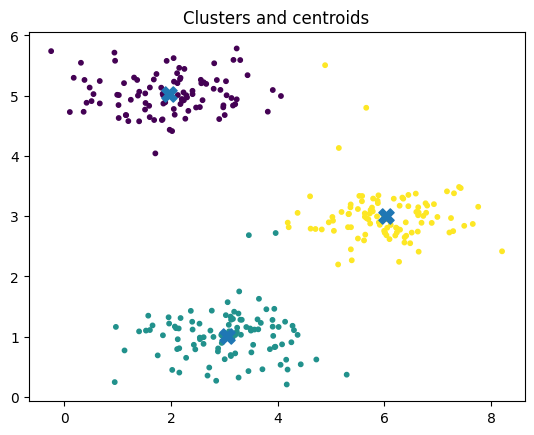

In [ ]:
# TODO: implement
def run_k_means(X, init_centroids, max_iters=10, rng=None):
    K = init_centroids.shape[0]
    centroids = init_centroids.copy().astype(float)
    history = [centroids.copy()]
    idx = None
    for it in range(max_iters):
        # idx = find_closest_centroids(X, centroids)
        # centroids = ...
        # history.append(centroids.copy())
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K, rng)
        history.append(centroids.copy())
        #pass
    return centroids, idx, history

# Example run
# final_centroids, idx, hist = run_k_means(X, init_centroids, max_iters=10)
# import matplotlib.pyplot as plt
# plt.figure(); plt.scatter(X[:,0], X[:,1], c=idx, s=10)
# plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='X', s=120)
# plt.title('Clusters and centroids'); plt.show()
final_centroids, idx, hist = run_k_means(X, init_centroids, max_iters=10)
plt.figure(); plt.scatter(X[:,0], X[:,1], c=idx, s=10)
plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='X', s=120)
plt.title('Clusters and centroids'); plt.show()

## Task 5 - Initializing centroids
Implement `init_centroids(X, K, rng)` that picks K distinct random points from X.

Test by printing initial centroids for K = 3.

In [ ]:
# TODO: implement
def init_centroids(X, K, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    m = X.shape[0]
    # idx = ...
    # return X[idx].astype(float)
    idx = rng.choice(m, size=K, replace=False)
    return X[idx].astype(float)
    raise NotImplementedError

# print(init_centroids(X, 3))
print(init_centroids(X, 3))

[[6.80029526 3.17579578]
 [1.40597916 5.06636822]
 [5.6673103  2.96477867]]


## Task 6 - Multiple initializations and evaluation
Define an inertia function `withinss(X, centroids, idx)` to compute the sum of squared distances to centroids.

- Run K-means for several random seeds
- Keep the run with lowest inertia
- Save a CSV report with x1, x2, cluster label

In [ ]:
# TODO: implement inertia and multi-start search
def withinss(X, centroids, idx):
    # diffs = ...
    # return float(np.sum(diffs * diffs))
    diffs = X - centroids[idx]
    return float(np.sum(diffs * diffs))

# best = {'score': np.inf}
# for seed in range(5):
#     rng = np.random.default_rng(seed)
#     c0 = init_centroids(X, 3, rng)
#     cF, idxF, hist = run_k_means(X, c0, max_iters=10, rng=rng)
#     s = withinss(X, cF, idxF)
#     if s < best['score']:
#         best = {'score': s, 'centroids': cF, 'idx': idxF}
# print('Best inertia:', best['score'])
best = {'score': np.inf}
for seed in range(5):
    rng = np.random.default_rng(seed)
    c0 = init_centroids(X, 3, rng)
    cF, idxF, hist = run_k_means(X, c0, max_iters=10, rng=rng)
    s = withinss(X, cF, idxF)
    if s < best['score']:
        best = {'score': s, 'centroids': cF, 'idx': idxF}
print('Best inertia:', best['score'])

# import pandas as pd
# rep = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'cluster': best['idx']})
# rep.to_csv('kmeans_assignments.csv', index=False)
# print('Wrote kmeans_assignments.csv')
import pandas as pd
rep = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'cluster': best['idx']})
rep.to_csv('kmeans_assignments.csv', index=False)
print('Wrote kmeans_assignments.csv')

Best inertia: 266.65851965491936
Wrote kmeans_assignments.csv
